<a href="https://colab.research.google.com/github/sunny420x/Scores-Prediction-Model-of-Student-Performance-Factors-Dataset./blob/main/StudentPerformanceFactor_LinearRegression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning ##

In [32]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def ScoresWord(val):
  if(val == 'Low' or val == 'Near'):
    return 1
  if(val == 'Medium' or val == 'Moderate'):
    return 2
  if(val == "High" or val == 'Far'):
    return 3
  return val

def ScoreYesNo(val):
  if(val == "Yes"):
    return 1
  if(val == "No"):
    return 0
  return val

def Peer_Influence(val):
  if(val == "Positive"):
    return 3
  if(val == "Neutral"):
    return 2
  if(val == "Negative"):
    return 1
  return val

def SchoolType(val):
  if(val == "Public"):
    return 1
  if(val == "Private"):
    return 0
  return val

def Gender(val):
  if(val == "Male"):
    return 1
  if(val == "Female"):
    return 0
  return val

def ParentDucationScore(val):
  if(val == "High School"):
    return 1
  if(val == "College"):
    return 2
  if(val == "Postgraduate"):
    return 3
  return val

names = "Hours_Studied Attendance Parental_Involvement Access_to_Resources Extracurricular_Activities Sleep_Hours Previous_Scores Motivation_Level Internet_Access Tutoring_Sessions Family_Income Teacher_Quality School_Type Peer_Influence Physical_Activity Learning_Disabilities Parental_Education_Level Distance_from_Home Gender Exam_Score".split(" ")

df = pd.read_csv("./Data/StudentPerformanceFactors.csv", names=names)
df = df[1::]
df = df.applymap(ScoresWord)
df = df.applymap(ScoreYesNo)
df = df.applymap(Peer_Influence)
df = df.applymap(SchoolType)
df = df.applymap(ParentDucationScore)
df = df.applymap(Gender)
df = df.fillna(0)

df.head(100)

<ipython-input-32-a9abac3ed037>:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(ScoresWord)
<ipython-input-32-a9abac3ed037>:61: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(ScoreYesNo)
<ipython-input-32-a9abac3ed037>:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(Peer_Influence)
<ipython-input-32-a9abac3ed037>:63: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(SchoolType)
<ipython-input-32-a9abac3ed037>:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(ParentDucationScore)
<ipython-input-32-a9abac3ed037>:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(Gender)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1,23,84,1,3,0,7,73,1,1,0,1,2.0,1,3,3,0,1.0,1.0,1,67
2,19,64,1,2,0,8,59,1,1,2,2,2.0,1,1,4,0,2.0,2.0,0,61
3,24,98,2,2,1,7,91,2,1,2,2,2.0,1,2,4,0,3.0,1.0,1,74
4,29,89,1,2,1,8,98,2,1,1,2,2.0,1,1,4,0,1.0,2.0,1,71
5,19,92,2,2,1,6,65,2,1,3,2,3.0,1,2,4,0,2.0,1.0,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,11,91,2,2,0,6,94,2,1,3,2,2.0,1,2,3,0,2.0,2.0,1,68
97,22,64,1,2,0,7,98,1,0,1,2,2.0,1,1,3,0,1.0,1.0,1,62
98,22,81,2,2,1,7,77,1,1,2,2,2.0,1,3,3,0,3.0,3.0,0,68
99,20,69,3,3,1,6,73,2,1,2,1,2.0,0,3,3,0,1.0,3.0,1,66


## Split X,Y and find a suitable attribute for a training ##

In [103]:
# Feature extraction
df_arr = df.values
X = df_arr[:,0:len(df_arr[1])-1]
Y = df_arr[:,len(df_arr[1])-1]

test = SelectKBest(score_func=chi2, k=15)
fit = test.fit(X, Y)

# Summarize scores
# print(names[1:122])
np.set_printoptions(precision=None)
# print(fit.scores_)
print(fit.get_feature_names_out())

X_selection = fit.transform(X)

feature_names = fit.get_feature_names_out()
column_indices = [int(name.split("x")[1]) for name in feature_names]
print("---------------------")
for index in column_indices:
    if 0 <= index < len(df.columns):
        print(df.columns[index])
    else:
        print(f"Index {index} is out of range.")

['x0' 'x1' 'x2' 'x3' 'x4' 'x6' 'x7' 'x9' 'x10' 'x13' 'x14' 'x15' 'x16'
 'x17' 'x18']
---------------------
Hours_Studied
Attendance
Parental_Involvement
Access_to_Resources
Extracurricular_Activities
Previous_Scores
Motivation_Level
Tutoring_Sessions
Family_Income
Peer_Influence
Physical_Activity
Learning_Disabilities
Parental_Education_Level
Distance_from_Home
Gender


## Training the model. ##

X train size: 5285
X test size: 1322
Y train size: 5285
Y test size: 1322
Train MSE: 4.528964238067685
Test MSE: 3.4024490559967107
Train R²: 0.705547418455221
Test R²: 0.7592902998918154


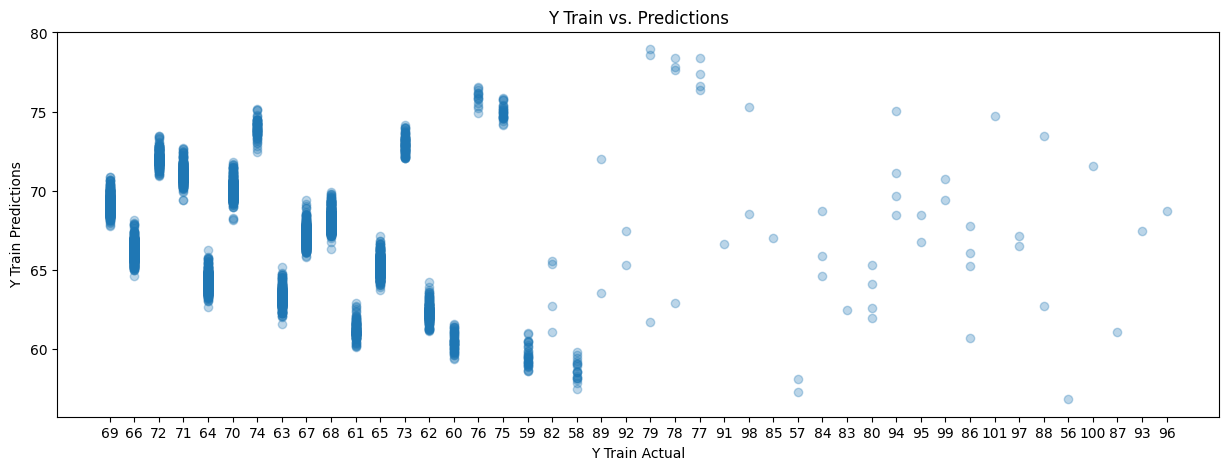

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

X_train, X_test, Y_train, Y_test = train_test_split(X_selection, Y, test_size=0.2, random_state=42)

print("X train size: "+str(len(X_train)))
print("X test size: "+str(len(X_test)))

print("Y train size: "+str(len(Y_train)))
print("Y test size: "+str(len(Y_test)))

lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_linear_train_prediction = lr.predict(X_train)
Y_linear_test_prediction = lr.predict(X_test)

#Y_linear_train_prediction
#Y_linear_test_prediction

lr_train_mse = mean_squared_error(Y_train, Y_linear_train_prediction)
lr_test_mse = mean_squared_error(Y_test, Y_linear_test_prediction)

lr_train_r2 = r2_score(Y_train, Y_linear_train_prediction)
lr_test_r2 = r2_score(Y_test, Y_linear_test_prediction)

print("Train MSE:",lr_train_mse)
print("Test MSE:",lr_test_mse)
print("Train R²:", lr_train_r2)
print("Test R²:", lr_test_r2)

plt.figure(figsize=(15,5))
plt.scatter(Y_train, Y_linear_train_prediction , alpha=0.3)
# plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=1)
plt.ylabel("Y Train Predictions")
plt.xlabel("Y Train Actual")
plt.title("Y Train vs. Predictions")
plt.show()

## Random Data Prediction ##

In [101]:
data = []
for index in column_indices:
    if 0 <= index < len(df.columns):
        value = float(input(f"Enter {df.columns[index]}: "))
        data.append(value)
data = np.array(data).reshape(1, -1)

# Make a prediction using the trained model
Y_prediction = lr.predict(data)

# Print the predicted result
print("Predicted Y:", Y_prediction)

Enter Hours_Studied: 15
Enter Attendance: 50
Enter Parental_Involvement: 1
Enter Access_to_Resources: 2
Enter Previous_Scores: 65
Enter Tutoring_Sessions: 0
Enter Peer_Influence: 1
Enter Learning_Disabilities: 0
Enter Parental_Education_Level: 2
Enter Distance_from_Home: 1
Predicted Y: [57.2305084]
